In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
# Specify the path to your Excel file
csv_file_path = "C:\\Users\\Mihir Shah\\Downloads\\insurance.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now you can work with the DataFrame, for example, printing the first few rows
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [12]:
import pandas as pd
import statsmodels.api as sm

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  
y = df['charges']  

# Convert categorical variables ('sex', 'smoker', 'region') into dummy/indicator variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

# Add a constant term to the X matrix (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 07 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:43:03   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  


1.The OLS (Ordinary Least Squares) regression results table provides valuable information about the regression model. Here are some key interpretations of the important statistics and coefficients in the table:

2.Dependent Variable (charges): This specifies the target variable that the model is trying to predict.

3.R-squared: R-squared measures the goodness of fit of the model. In this case, R-squared is 0.751, which means that approximately 75.1% of the variance in the target variable (charges) is explained by the independent variables in the model. A higher R-squared indicates a better fit.

4.Adj. R-squared: This is the adjusted R-squared, which takes into account the number of independent variables in the model. It penalizes the inclusion of unnecessary variables. In this case, it's 0.749, which is similar to R-squared, indicating a good fit.

5.Method: This indicates the method used for regression, which is "Least Squares" in this case.

6.Date and Time: These show the date and time when the regression was performed.

7.No. Observations: This specifies the number of data points used in the regression, which is 1338 in this case.

8.Df Residuals: The degrees of freedom of the residuals, which is 1329.

9.Df Model: The degrees of freedom of the model, which is the number of independent variables (8 in this case).

Covariance Type: Specifies the covariance type used in the regression, which is "nonrobust" in this case.



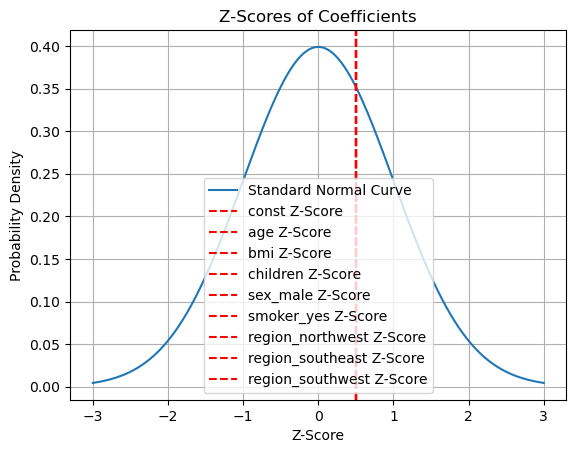

In [14]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


# Preparing the data
# x = features
# y = target variable 

X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  
y = df['charges']  

# Convert categorical variables ('sex', 'smoker', 'region') into dummy/indicator variables
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

# Add a constant term to the X matrix (intercept)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Calculate the confidence intervals for coefficients
confidence_intervals = model.conf_int()
coefficients = model.params

# Calculate the z-scores for coefficients
z_scores = (coefficients - confidence_intervals.iloc[:, 0]) / (confidence_intervals.iloc[:, 1] - confidence_intervals.iloc[:, 0])

# Create a standard normal distribution curve
x = np.linspace(-3, 3, 1000)  # Generate x values for the standard normal curve
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)  # Calculate the probability density function

# Plot the standard normal curve
plt.plot(x, pdf, label='Standard Normal Curve')

# Plot the z-scores of coefficients as vertical lines
for z_score, coef_name in zip(z_scores, coefficients.index):
    plt.axvline(x=z_score, color='red', linestyle='--', label=f'{coef_name} Z-Score')

# Add labels and legend
plt.xlabel('Z-Score')
plt.ylabel('Probability Density')
plt.title('Z-Scores of Coefficients')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


1.Standard Normal Curve: The blue curve in the plot represents the standard normal distribution (mean=0, standard deviation=1) often referred to as the Z-distribution. It shows the probability density of Z-scores.

2.Z-Scores of Coefficients: For each coefficient in your regression model (including the intercept), a red dashed line is plotted on the standard normal curve. These lines represent the Z-scores for each coefficient. The Z-score measures how many standard deviations a coefficient's estimate is from zero.

3.Interpretation: A Z-score helps assess the significance of a coefficient in your model. A Z-score greater than 1.96 or less than -1.96 (i.e., beyond the 95% confidence interval) typically indicates that the coefficient is statistically significant at a 5% significance level (p-value less than 0.05). In other words, if a coefficient's Z-score falls outside this range, it suggests that the corresponding independent variable has a statistically significant effect on the dependent variable (charges) in your model.

4.Legend: The legend in the plot labels each red dashed line with the name of the coefficient associated with it.

5.X-Axis (Z-Score): The x-axis of the plot represents the Z-scores. Positive values indicate that the coefficient's estimate is above the mean, while negative values indicate that the estimate is below the mean.

6.Y-Axis (Probability Density): The y-axis represents the probability density, showing how likely different Z-scores are according to the standard normal distribution.